In [11]:
import sys
sys.path.append('../')
from pyACC.sampler import MCMC

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [14]:
my_fun = sp.stats.skewnorm(a=5, loc=3, scale=2).pdf
print(type(my_fun))

<class 'method'>


In [15]:
sample = MCMC.metropolis_hastings(0, my_fun, 2.5, 100000)

/Users/edoardo/miniconda3/envs/acc-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

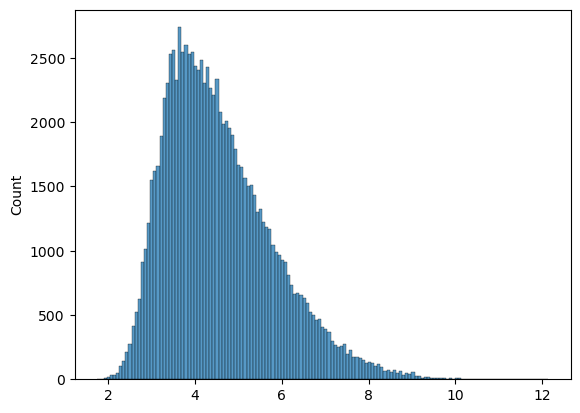

In [16]:
sns.histplot(sample)